In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# Problem 1 :Delivery_time -> Predict delivery time using sorting time

In [2]:
delivery_data= pd.read_csv('delivery_time.csv')
delivery_data.head(50)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#No null values found and data type also assigned properly

delivery_data.describe()

In [5]:
#Renaming of columns to remove space between names and remove upper case
delivery_data = delivery_data.rename(columns={'Delivery Time':'delivery_time',
                                              'Sorting Time':'sorting_time'},
                                                inplace=False)

In [6]:
delivery_data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
delivery_data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:>

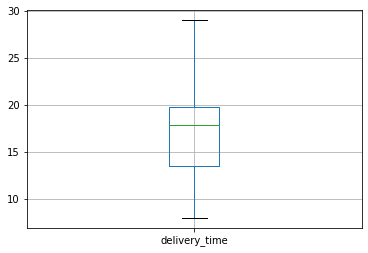

In [8]:
#checking outliers for delivery time
delivery_data.boxplot(column=['delivery_time'])
 

In [9]:
#No outlier found for delivery time

<AxesSubplot:>

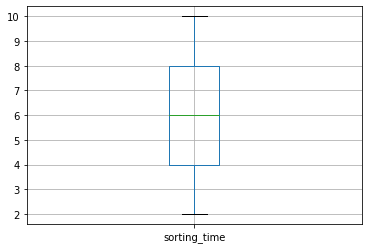

In [10]:
#chekcing outliers for sorting time 
delivery_data.boxplot(column=['sorting_time'])

array([[<AxesSubplot:title={'center':'delivery_time'}>]], dtype=object)

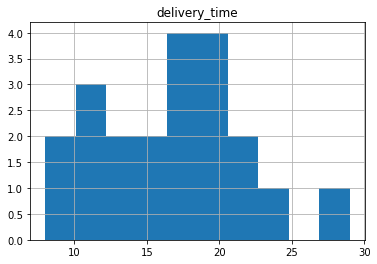

In [11]:
#Histogram of Delivery time
delivery_data.hist(['delivery_time'])

array([[<AxesSubplot:title={'center':'sorting_time'}>]], dtype=object)

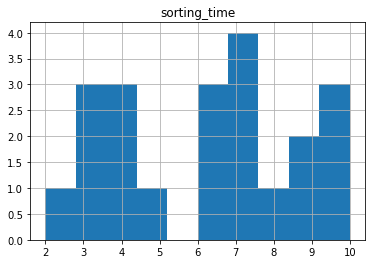

In [12]:
#Histogram for sorting time
delivery_data.hist(['sorting_time'])

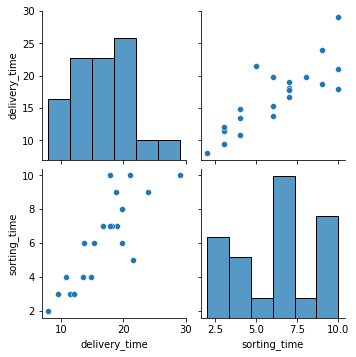

In [13]:
sns.pairplot(delivery_data)

In [14]:
delivery_data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [15]:
#values are more than 0.6 so strong linear relationship is between
#delivery_time and sorting_time

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

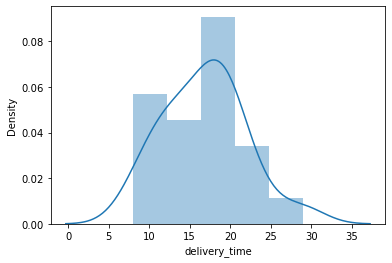

In [16]:
sns.distplot(delivery_data['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

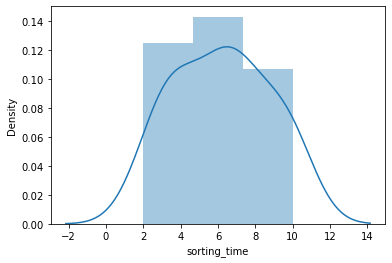

In [17]:
sns.distplot(delivery_data['sorting_time'])

In [18]:
delivery_model  = smf.ols('delivery_time~sorting_time',data=delivery_data).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

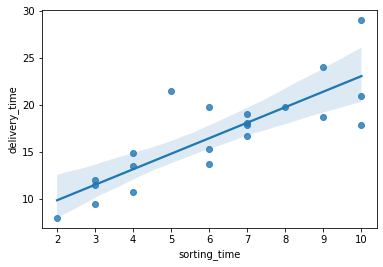

In [19]:
sns.regplot(x='sorting_time',y='delivery_time',data=delivery_data)

In [20]:
delivery_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [21]:
delivery_model.pvalues
#to check that p value<0.05 we reject the null hypothesis and conclude that
#there is a statistically significant relationship between the 
#delivery time and the sorting time.

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [22]:
delivery_model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [23]:
#R squared values 
#higher the R-squared, the better the model fits your data
delivery_model.rsquared

0.6822714748417231

In [24]:
newdata=pd.Series([3,4,5])

In [25]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [26]:
delivery_model.predict(data_pred)

0    11.529794
1    13.178814
2    14.827833
dtype: float64

In [27]:
#chekicng for another model
#checking relationship between log of sorting_time and delivary_time

In [28]:
delivery_data['sorting_time'] = np.log(delivery_data['sorting_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

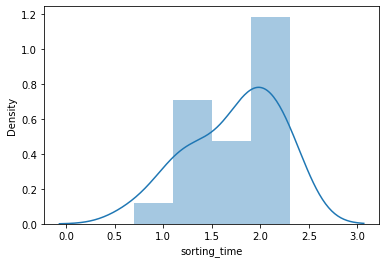

In [29]:
sns.distplot(delivery_data['sorting_time'])

In [30]:
delivery_model_2 = smf.ols('delivery_time~sorting_time',data=delivery_data).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

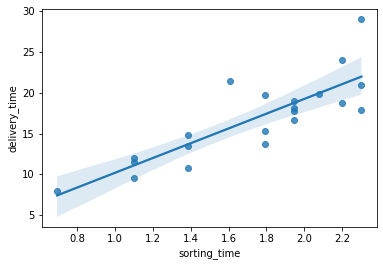

In [31]:
sns.regplot(x='sorting_time',y='delivery_time',data=delivery_data)

In [32]:
delivery_model_2.params

Intercept       1.159684
sorting_time    9.043413
dtype: float64

In [33]:
delivery_model_2.pvalues

Intercept       0.641980
sorting_time    0.000003
dtype: float64

In [34]:
delivery_model_2.tvalues

Intercept       0.472460
sorting_time    6.586789
dtype: float64

In [35]:
delivery_model_2.rsquared

0.6954434611324223

In [36]:
#R square is significantly increased with second model

In [37]:
delivery_data['delivery_time'] = np.log(delivery_data['delivery_time'])

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

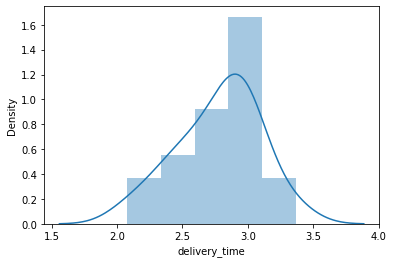

In [38]:
sns.distplot(delivery_data['delivery_time'])

In [39]:
delivery_model_3  = smf.ols('delivery_time~sorting_time',data=delivery_data).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

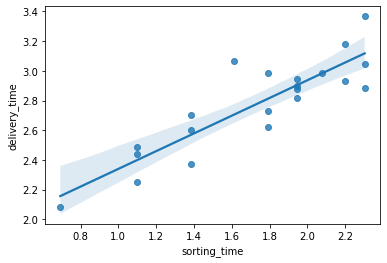

In [40]:
sns.regplot(x='sorting_time',y='delivery_time',data=delivery_data)

In [41]:
#predicting delivery time for sorting time 3,4,5
newdata=pd.Series([3,4,5])
newdata

0    3
1    4
2    5
dtype: int64

In [42]:
newdata_frame = pd.DataFrame(newdata,columns=['sorting_time'])
newdata_frame

,sorting_time
0,3
1,4
2,5


In [43]:
delivery_model_3.predict(newdata_frame)

0    3.534554
1    4.132076
2    4.729599
dtype: float64

# Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [44]:
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.head(20)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [45]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [46]:
salary_df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [47]:
salary_df.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [48]:
#Independent variable is Year of experince on which salary depends
X = salary_df['YearsExperience']  
X.head() 

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [49]:
y = salary_df['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

Dealing with outliers :

<AxesSubplot:xlabel='YearsExperience'>

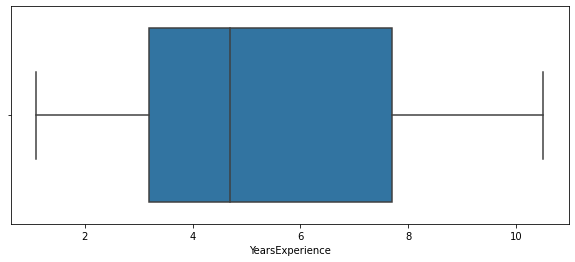

In [50]:
plt.figure(figsize=(10,4))
sns.boxplot(X)


In [51]:
#No outlier found for Year of Experience 

<AxesSubplot:xlabel='Salary'>

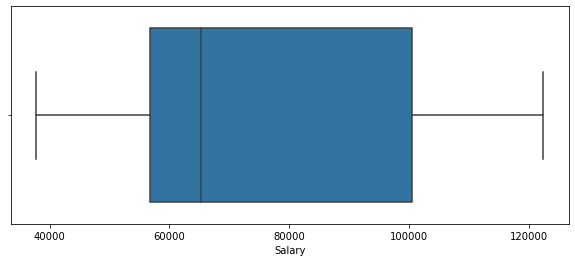

In [52]:
plt.figure(figsize=(10,4))
sns.boxplot(y)


In [53]:
#No outlier found for Salary 

<AxesSubplot:title={'center':'Years of Experience and Salary'}, xlabel='YearsExperience', ylabel='Salary'>

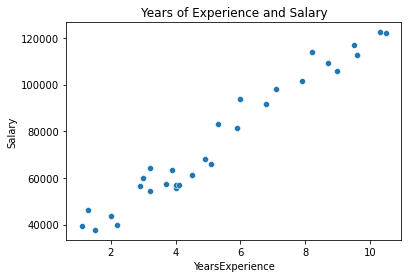

In [54]:
#Checking Linear relationship 
plt.title('Years of Experience and Salary')
sns.scatterplot(data=salary_df,x=X,y=y)

From Scatterplot it is clear that both variables are having linear relationship with 
each other.

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

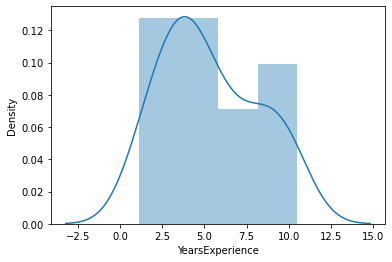

In [55]:
sns.distplot(X)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

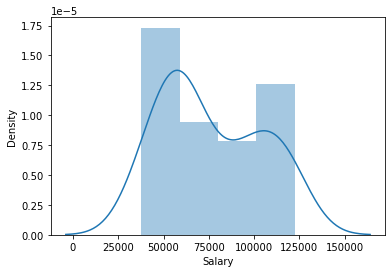

In [56]:
sns.distplot(y)

#Finding the correlation between YearsOfExperience and Salary

In [57]:
salary_df['YearsExperience'].corr(salary_df['Salary'])

0.9782416184887599

The correlation between both vaiablesis more than 0.6 i.e. 
they are linearly correlated.Now we apply LinearRegrassion
on given dataset.

In [58]:
X_matrix = X.values.reshape(-1,1)
y_matrix =y.values.reshape(-1,1)

Divide data in train and test

In [59]:

from sklearn.model_selection import train_test_split


In [60]:

X_train,X_test,y_train,y_test = train_test_split(X_matrix,y_matrix,test_size=0.20,random_state=365)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24, 1), (6, 1))

Create the Regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
reg  = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [63]:
#Coefficient and intecept value


In [64]:
reg.coef_

array([[9491.08993011]])

In [65]:
reg.intercept_

array([25195.20157908])

In [66]:
#Predicting y value for X_test

In [67]:
y_predict = reg.predict(X_test)
y_predict

array([[116309.6649081 ],
       [100174.81202692],
       [ 53668.4713694 ],
       [110615.01095004],
       [107767.68397101],
       [103022.13900595]])

In [68]:
#Checking real value of y in test set

In [69]:
y_test

array([[112635.],
       [101302.],
       [ 60150.],
       [105582.],
       [109431.],
       [113812.]])

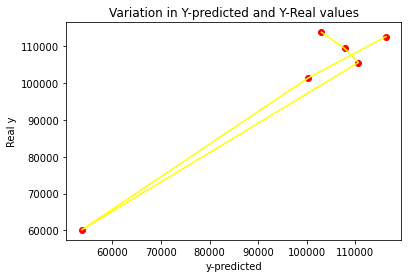

In [70]:
plt.scatter(y_predict,y_test,color="Red")
plt.plot(y_predict,y_test,color="yellow")
plt.title("Variation in Y-predicted and Y-Real values")
plt.xlabel("y-predicted")
plt.ylabel("Real y")
plt.show()

In [71]:
#Calculating error between predicted and real y values
error = y_predict-y_test
error

array([[  3674.6649081 ],
       [ -1127.18797308],
       [ -6481.5286306 ],
       [  5033.01095004],
       [ -1663.31602899],
       [-10789.86099405]])

In [72]:
#Evaluating Model

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [74]:
#Finding Error

In [75]:
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y_predict)))

Root Mean Squared Error is : 5792.27715740401


In [76]:
#Checking R-Square value 

In [77]:
print('R-Squared value for training data is :',reg.score(X_train,y_train))

R-Squared value for training data is : 0.951346424294163


In [78]:
print('R-Squared value test data is :',reg.score(X_test,y_test))

R-Squared value test data is : 0.90222423303666
